In [1]:
pip install pandas scikit-learn matplotlib seaborn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached 

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
#libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import classification_report, confusion_matrix, accuracy_score


## Step 1 load the data

In [5]:
df_test_values = pd.read_csv('../data/test_values.csv')
df_test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#check for shape , missing value, info duplicate value in df_test_values

print(f'The test_values has {df_test_values.shape[0]} rows and {df_test_values.shape[1]} columns')
print('_________________________________________________________________')
print(f'The test_values has: \n {df_test_values.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The test_values has{df_test_values.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The test_values has: \n {df_test_values.info()}')


The test_values has 86868 rows and 39 columns
_________________________________________________________________
The test_values has: 
 building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar

In [7]:
# similarly check in train_labels and train_values data set

df_train_labels = pd.read_csv('../data/train_labels.csv')
df_train_labels.head()

print(f'The train_labels has {df_train_labels.shape[0]} rows and {df_train_labels.shape[1]} columns')
print('_________________________________________________________________')
print(f'The train_labels has: \n {df_train_labels.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The train_labels has{df_train_labels.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The train_labels has: \n {df_train_labels.info()}')

The train_labels has 260601 rows and 2 columns
_________________________________________________________________
The train_labels has: 
 building_id     0
damage_grade    0
dtype: int64 missing values
_________________________________________________________________
The train_labels has0 duplicates
_________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB
The train_labels has: 
 None


In [8]:
# train_values
df_train_values = pd.read_csv('../Data/train_values.csv')


print(f'The train_values has {df_train_values.shape[0]} rows and {df_train_values.shape[1]} columns')
print('_________________________________________________________________')
print(f'The train_values has: \n {df_train_values.isnull().sum()} missing values')
print('_________________________________________________________________')
print(f'The train_values has{df_train_values.duplicated().sum()} duplicates')
print('_________________________________________________________________')
print(f'The train_values has: \n {df_train_values.info()}')

The train_values has 260601 rows and 39 columns
_________________________________________________________________
The train_values has: 
 building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mor

In [9]:
X = df_train_values
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = df_train_labels 
y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [11]:
#Summary statistics of data
X.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [12]:
#value count for categorical labels

categorical_col = X.select_dtypes(include= ['object']).columns

#freq_count = {}
for feature in categorical_col:
    print(f'unique  value for {feature}:')
    print(X[feature].unique())
    #freq_count[feature] = X[feature].value_counts()
    print(X[feature].value_counts())

unique  value for land_surface_condition:
['t' 'o' 'n']
land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64
unique  value for foundation_type:
['r' 'w' 'i' 'u' 'h']
foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64
unique  value for roof_type:
['n' 'q' 'x']
roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64
unique  value for ground_floor_type:
['f' 'x' 'v' 'z' 'm']
ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64
unique  value for other_floor_type:
['q' 'x' 'j' 's']
other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64
unique  value for position:
['t' 's' 'j' 'o']
position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64
unique  value for plan_configuration:
['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
plan_configuration
d    250072
q      5692
u      3649
s       346
c

In [13]:
#value count for numerical labels

numerical_col = X.select_dtypes(include= ['int64']).columns

#freq_count = {}
for feature in numerical_col:
    print(f'unique  value for {feature}:')
    print(X[feature].unique())
    #freq_count[feature] = X[feature].value_counts()
    print(X[feature].value_counts())

unique  value for building_id:
[802906  28830  94947 ... 602512 151409 747594]
building_id
747594    1
802906    1
28830     1
94947     1
590882    1
         ..
287845    1
444381    1
452227    1
7962      1
989500    1
Name: count, Length: 260601, dtype: int64
unique  value for geo_level_1_id:
[ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_1_id
6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: count, dtype: int64
unique  value for geo_level_2_id:
[487 900 363 ...  77 115 627]
geo_level_2_id
39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
441        1
796        1
392      

### Step 3 Visualisation

##### Ditribution plot of numerical col



In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [15]:
numerical_col = X.select_dtypes(include= ['int64']).columns
len(numerical_col)

31

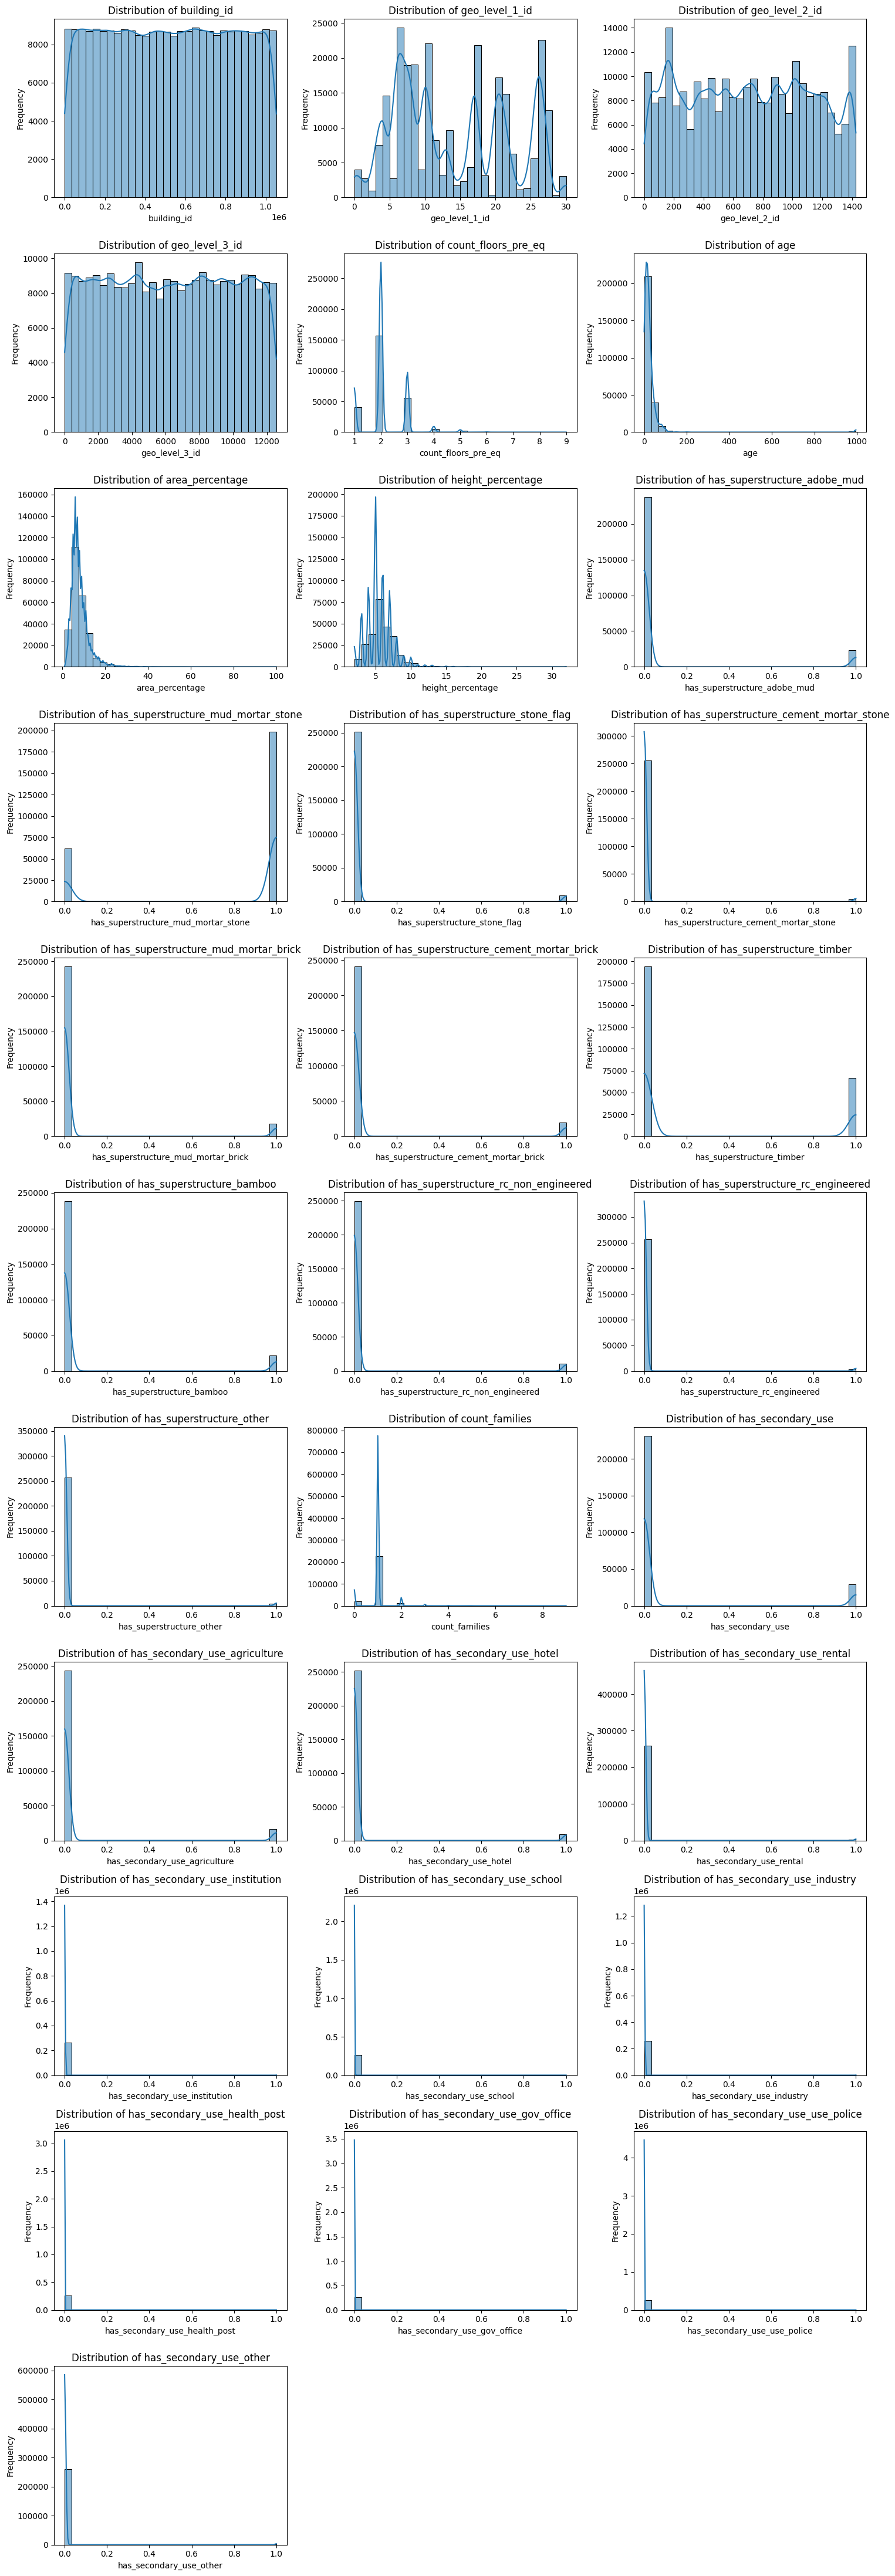

In [16]:
numerical_col = X.select_dtypes(include= ['int64']).columns

# Set the number of rows and columns for subplots
num_cols = 3  
num_rows = (len(numerical_col) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15,num_rows*4))

for i, feature in enumerate(numerical_col):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(X[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [30]:
X['age'].value_counts().sort_values(ascending=False)

age
10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
135        5
175        5
190        3
145        3
165        2
195        2
155        1
185        1
Name: count, dtype: int64

In [38]:
X[X['age'] >=100].shape

(3488, 39)

In [56]:
X['count_families'].unique()

array([1, 0, 2, 3, 4, 5, 6, 7, 9, 8])

- people with age 0 are 26041
- people more than 100 year old : 3488
- more related feature has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel', 'has_secondary_use_rental', 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo'

In [51]:
X.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

<Axes: >

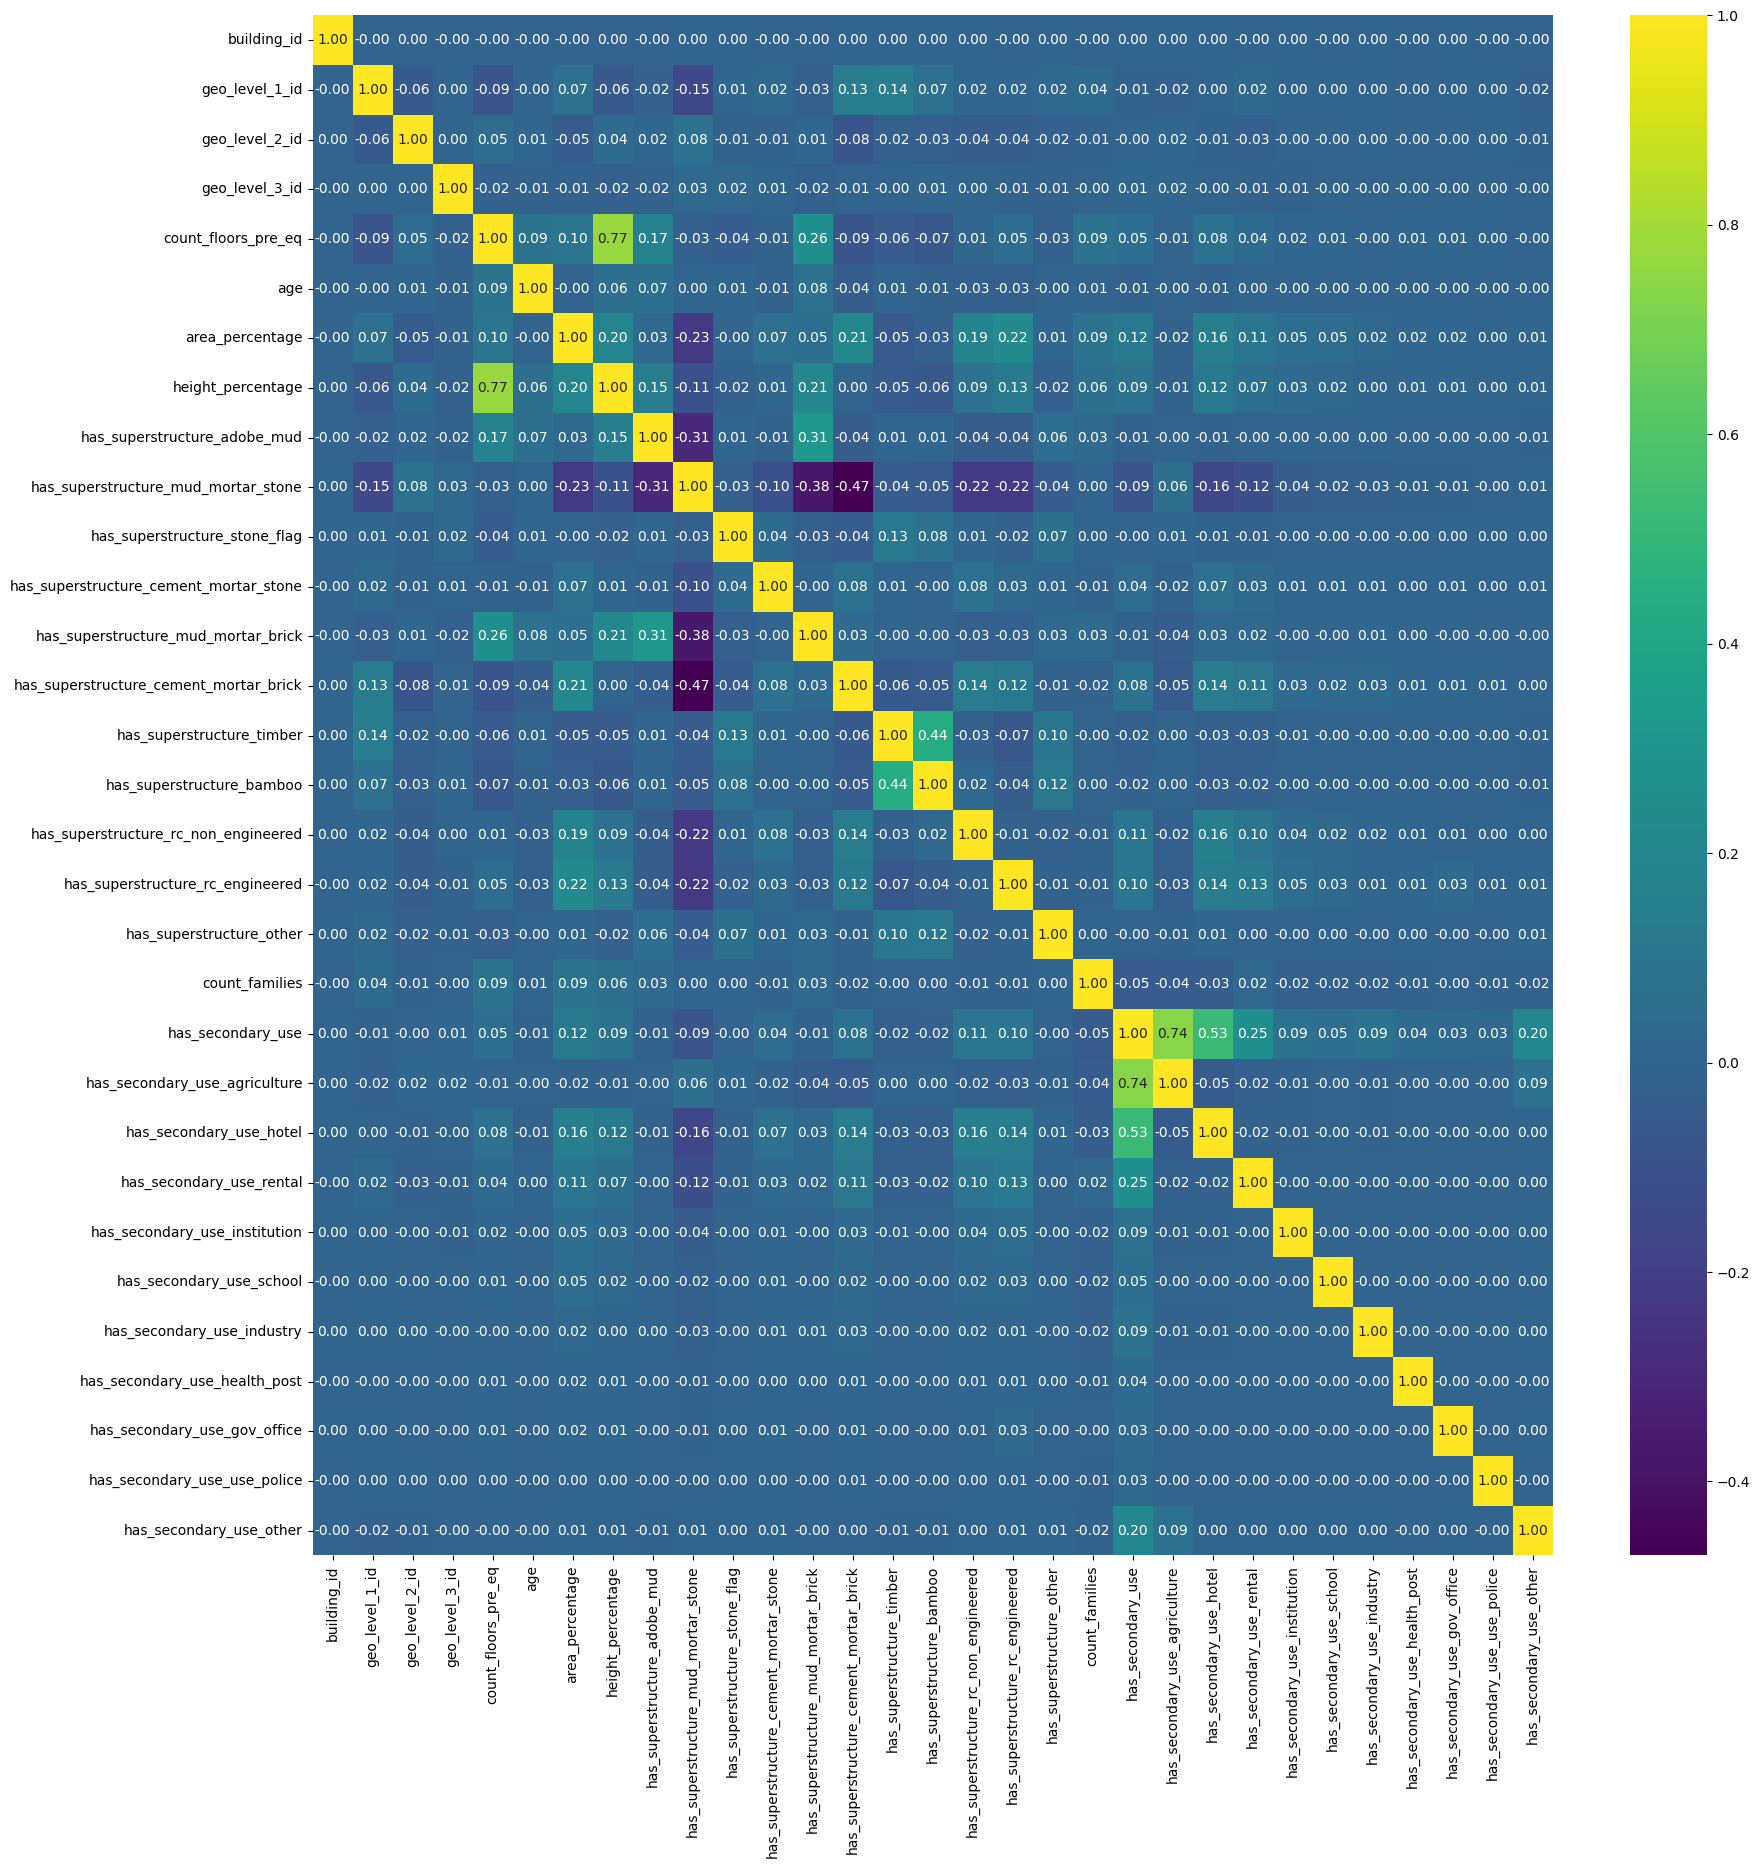

In [45]:
numerical_cor = X.select_dtypes(include=['int64']).corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(numerical_cor, cmap='viridis', fmt='.2f', annot=True)

<Axes: >

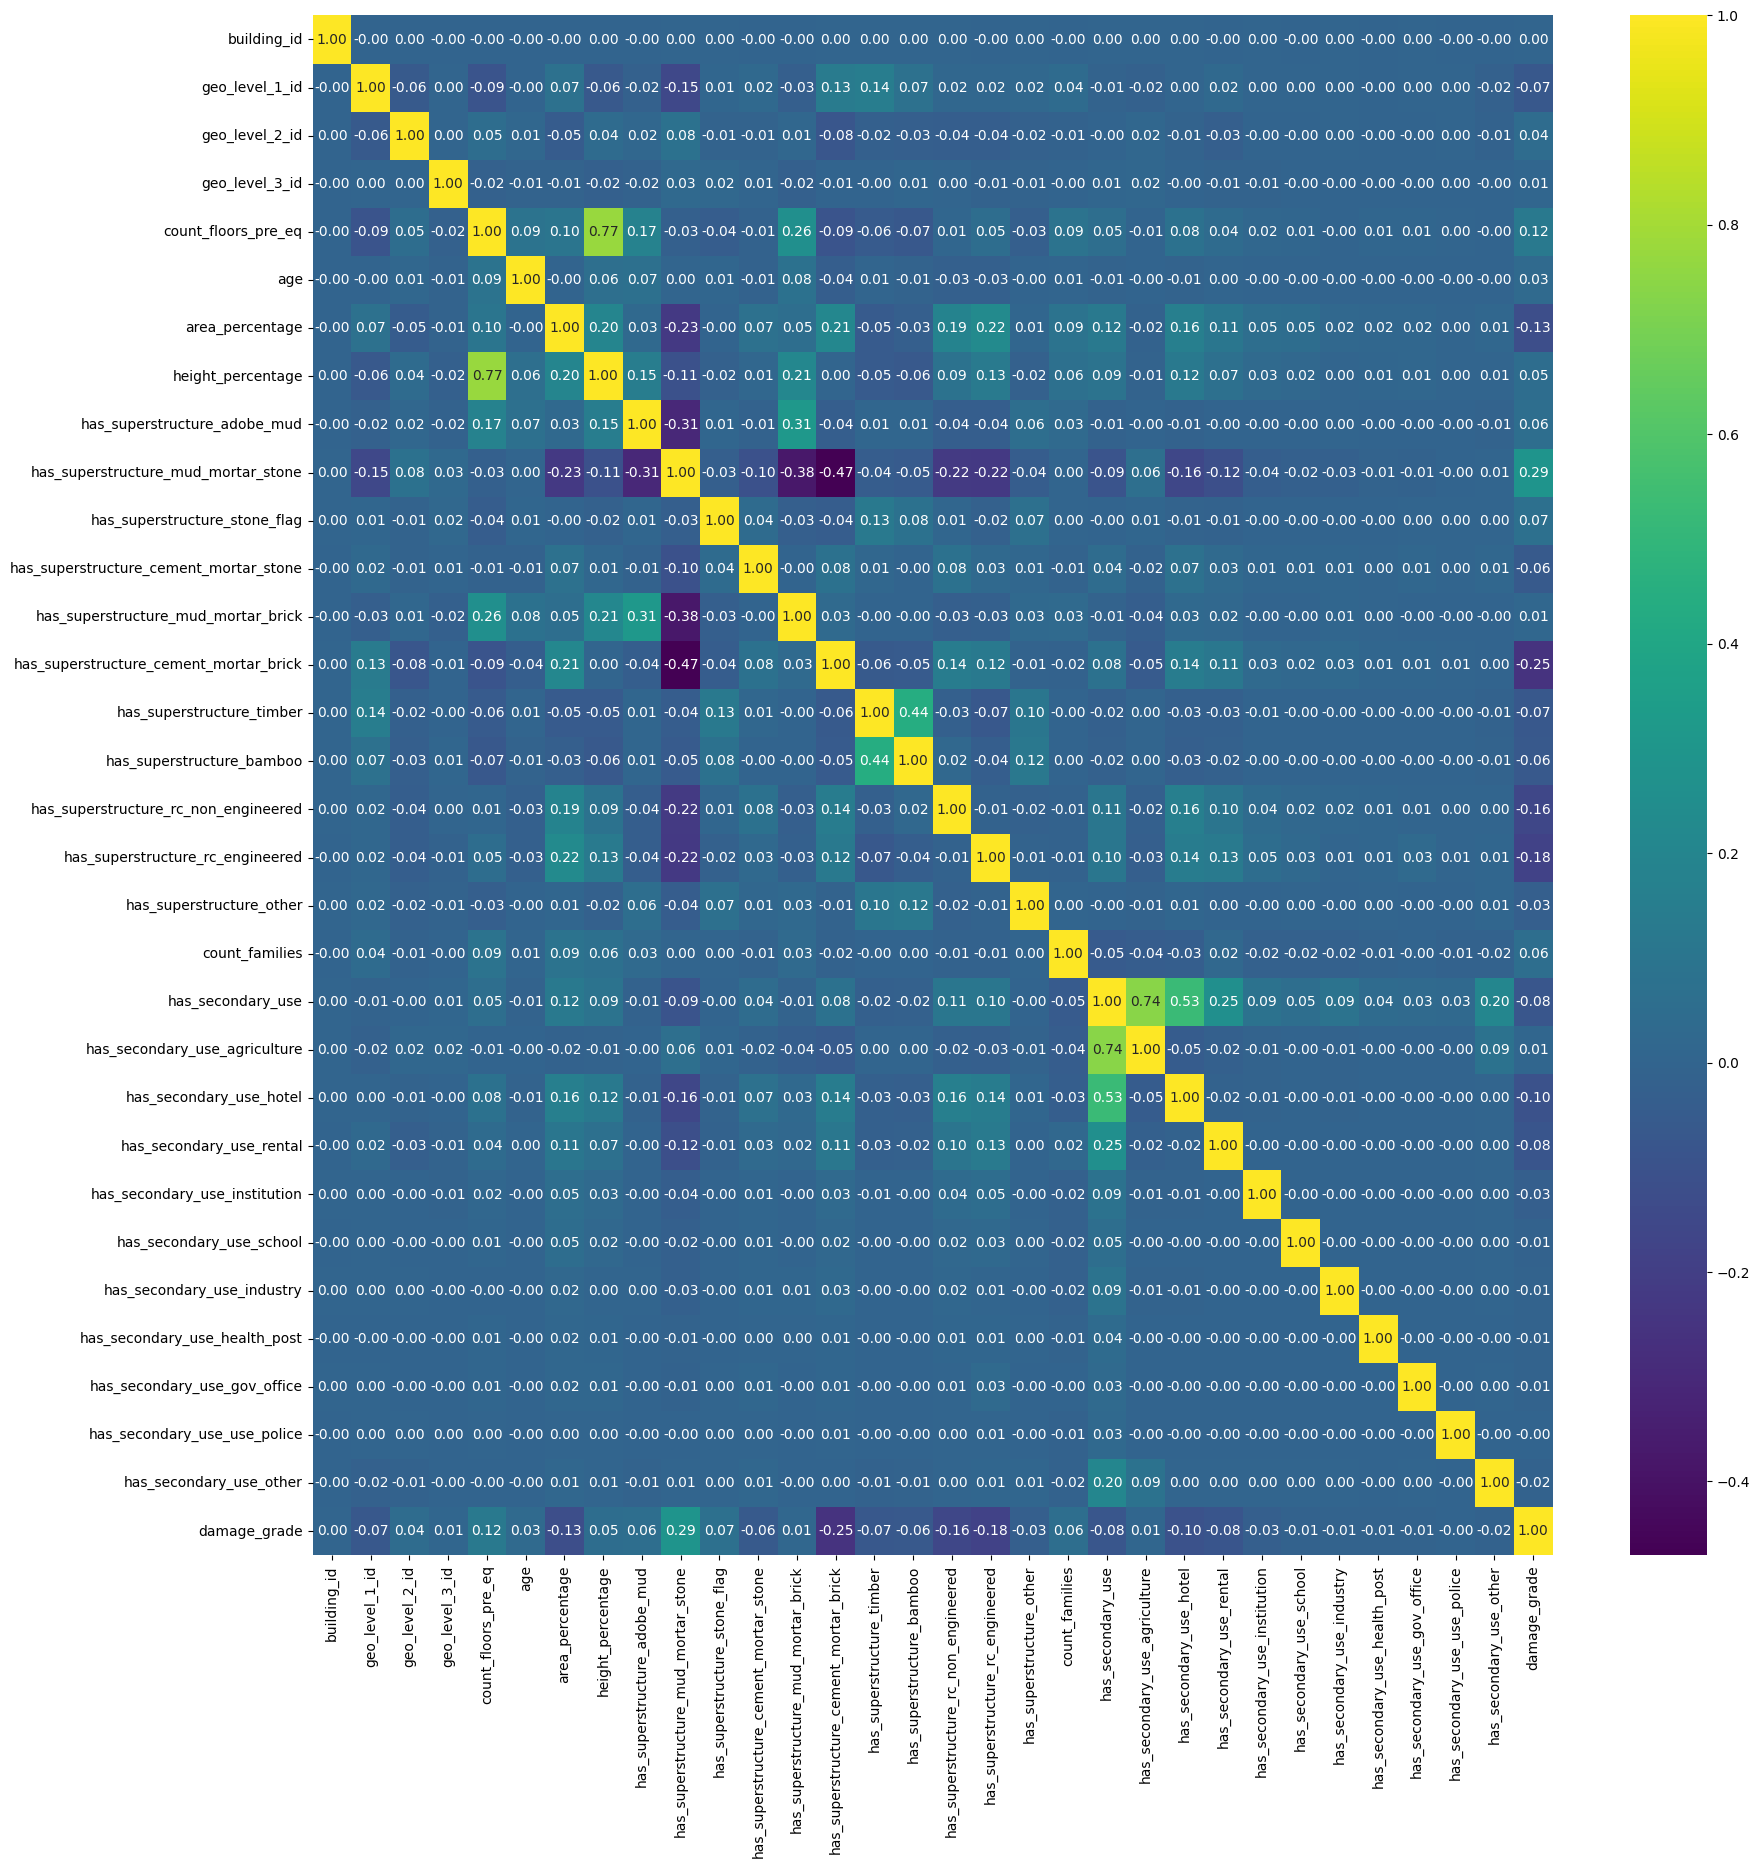

In [49]:
# correlation with target
df = pd.merge(X, y, on='building_id', how='inner')

cor = df.select_dtypes(include=['int64']).corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(cor, cmap='viridis', fmt='.2f', annot=True)


#### Distribution plot of categorical column

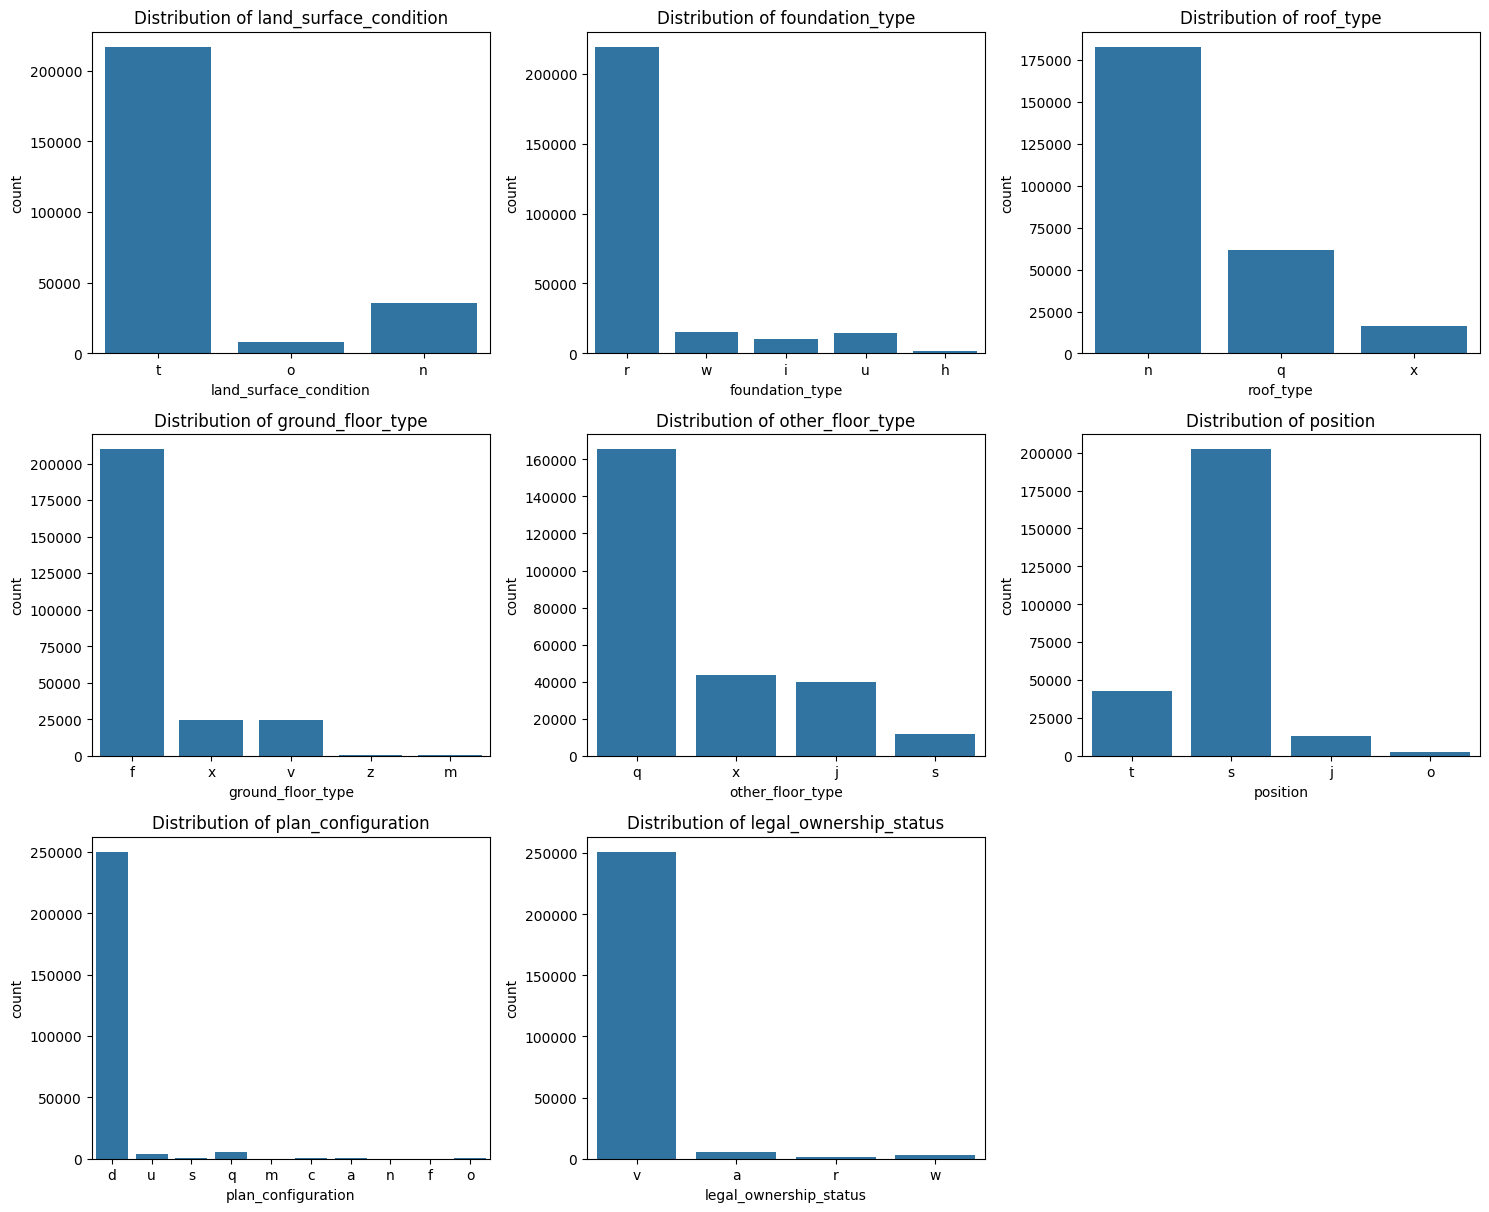

In [17]:
categorical_col = X.select_dtypes(include= ['object']).columns

num_cols = 3  
num_rows = (len(numerical_col) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15,num_rows*4))

for i, feature in enumerate(categorical_col):
    plt.subplot(num_rows, num_cols, i+1)
    #sns.histplot(X[feature], bins=30, kde=True)
    sns.countplot(x =X[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


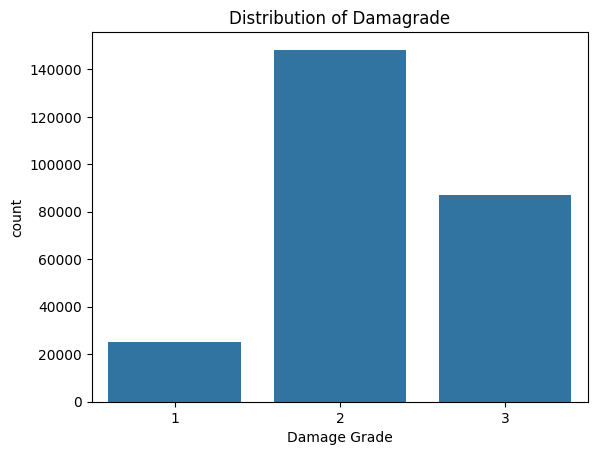

In [22]:
### Distribution of target variable

sns.countplot( x= 'damage_grade', data = y)
plt.title('Distribution of Damagrade')
plt.xlabel('Damage Grade')
plt.ylabel('count')           
plt.show()

no
